# 9.1 베타 이해하기

## 9.1.1 베타 계산하기

- 102110.KS: TIGER 200
- 039490.KS: 키움증권

In [3]:
import pandas_datareader as web
import pandas as pd

tickers = ['102110.KS', '039490.KS']

all_data = {}
for ticker in tickers:
    all_data[ticker] = web.DataReader(ticker, 'yahoo')

In [4]:
prices = pd.DataFrame({tic: data['Close'] for tic, data in all_data.items()})
ret = prices.pct_change().dropna()
ret.columns = ['rm', 'ri']

In [44]:
from statsmodels.formula.api import ols

fit = ols('ri ~ rm', data = ret).fit()

In [45]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ri   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     630.2
Date:                Fri, 05 Feb 2021   Prob (F-statistic):          2.08e-112
Time:                        22:19:45   Log-Likelihood:                 3000.5
No. Observations:                1219   AIC:                            -5997.
Df Residuals:                    1217   BIC:                            -5987.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0004      0.001      0.695      0.487      -0.001       0.002
rm             1.3315      0.053     25.104      0.000       1.227       1.436
==============================================================================
Omnibus:                      151.004   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.564
Skew:                           0.732   Prob(JB):                     9.04e-71
Kurtosis:                       5.051   Cond. No.                         89.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 9.1.2 베타 시각화

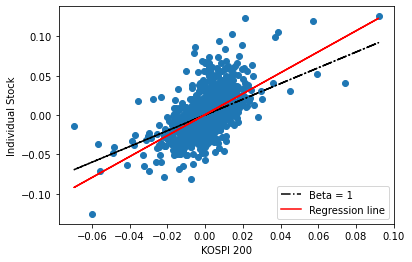

In [73]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

plt.scatter(ret['rm'],ret['ri']) # 원 데이터 산포도
plt.plot(ret['rm'],ret['rm'], '-.', color='black', label = 'Beta = 1') # beta = 1
plt.plot(ret['rm'],fit.fittedvalues,color='red', label = 'Regression line') # 회귀직선
 
plt.xlabel('KOSPI 200')
plt.ylabel('Individual Stock')
ax.legend(loc = 'lower right')
plt.show()

## 9.2 저변동성 전략

In [5]:
from statistics import stdev 

example = [85, 76, 73, 80, 72]
stdev(example)

5.357238094391549

## 9.2.1 저변동성 포트폴리오 구하기: 일간 기준

In [22]:
import pandas as pd
import numpy as np
from statistics import stdev 

KOR_price = pd.read_csv('data/KOR_price.csv', index_col = 0)

KOR_ticker = pd.read_csv('data/KOR_ticker.csv', index_col=0)
KOR_ticker['종목코드'] = KOR_ticker['종목코드'].astype(np.str).str.zfill(6)

In [23]:
ret = KOR_price.pct_change()

In [24]:
std_12m_daily  = ret.iloc[-252: ].apply(stdev, axis = 0)*np.sqrt(252)

In [25]:
std_12m_daily

005930    0.340240
000660    0.427779
051910    0.575808
207940    0.471964
005380    0.543926
            ...   
114570    0.439520
080440    0.462514
058420    0.997542
347140         NaN
158310    0.588562
Length: 2173, dtype: float64

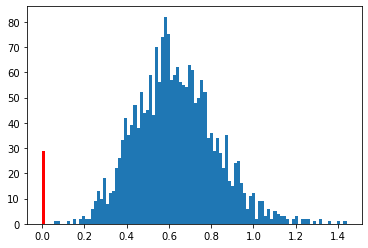

In [26]:
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(std_12m_daily, bins=100)

patches[0].set_fc('red') # Set color
patches[0].set_alpha(1) # Set opacity

In [27]:
std_12m_daily[std_12m_daily == 0] = np.nan

In [28]:
std_12m_daily[std_12m_daily.rank() <= 30]

268280    0.200170
001720    0.244699
072710    0.234231
016800    0.151684
000480    0.213002
015360    0.250704
004890    0.220081
176440    0.255595
100250    0.218530
134380    0.184164
117580    0.202525
024090    0.240118
003460    0.238900
007330    0.250486
003650    0.254054
034590    0.184442
040420    0.237527
007590    0.250728
005190    0.252569
273060    0.197063
109860    0.235346
000850    0.262831
084670    0.251166
339950    0.188008
037440    0.258264
221980    0.250655
168330    0.123779
043100    0.082590
069330    0.060311
033600    0.154418
dtype: float64

<BarContainer object of 30 artists>

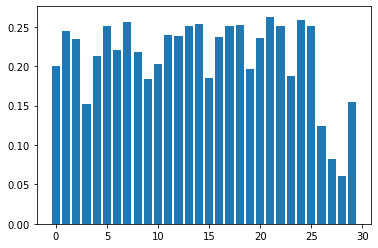

In [29]:
plt.bar(x = np.arange(30), 
        height = std_12m_daily[std_12m_daily.rank() <= 30])

In [33]:
invest_lowvol = (std_12m_daily.rank() <= 30)

invest_lowvol_res = KOR_ticker[invest_lowvol.values][['종목코드', '종목명']]
invest_lowvol_res['변동성'] = std_12m_daily[invest_lowvol].round(4).values

invest_lowvol_res

,종목코드,종목명,변동성
392,268280,미원에스씨,0.2002
422,001720,신영증권,0.2447
570,072710,농심홀딩스,0.2342
604,016800,퍼시스,0.1517
606,000480,조선내화,0.2130
869,015360,예스코홀딩스,0.2507
964,004890,동일산업,0.2201
1049,176440,에이치엔티,0.2556
1099,100250,진양홀딩스,0.2185
1137,134380,미원화학,0.1842


## 9.2.2 저변동성 포트폴리오 구하기: 주간 기준

In [34]:
KOR_price.index = pd.to_datetime(KOR_price.index)

In [35]:
ret_w = KOR_price.resample('W').ffill().pct_change()
std_12m_weekly = ret_w.iloc[-52: ].apply(stdev, axis = 0)*np.sqrt(52)
std_12m_weekly[std_12m_weekly == 0] = np.nan

In [36]:
std_12m_weekly[std_12m_weekly.rank() <= 30]

012750    0.254740
007310    0.244703
268280    0.190580
001720    0.253292
072710    0.238578
016800    0.122253
000480    0.222443
002960    0.252955
015360    0.241679
004890    0.254750
100250    0.245149
134380    0.236144
117580    0.209608
024090    0.247769
282690    0.251754
003460    0.180590
007330    0.246069
034590    0.163308
040420    0.188693
005190    0.237917
273060    0.173678
004450    0.243780
109860    0.172111
339950    0.244156
115310    0.192353
037440    0.212868
168330    0.144068
043100    0.059952
069330    0.032110
033600    0.178899
dtype: float64

In [37]:
invest_lowvol_weekly = (std_12m_weekly.rank() <= 30)

invest_lowvol_weekly_res = KOR_ticker[invest_lowvol_weekly.values][['종목코드', '종목명']]
invest_lowvol_weekly_res['변동성'] = std_12m_weekly[invest_lowvol_weekly].round(4).values

invest_lowvol_weekly_res

,종목코드,종목명,변동성
92,012750,에스원,0.2547
138,007310,오뚜기,0.2447
392,268280,미원에스씨,0.1906
422,001720,신영증권,0.2533
570,072710,농심홀딩스,0.2386
604,016800,퍼시스,0.1223
606,000480,조선내화,0.2224
609,002960,한국쉘석유,0.2530
869,015360,예스코홀딩스,0.2417
964,004890,동일산업,0.2548


In [38]:
pd.merge(invest_lowvol_res['종목명'], invest_lowvol_weekly_res['종목명'], how = 'inner')

,종목명
0,미원에스씨
1,신영증권
2,농심홀딩스
3,퍼시스
4,조선내화
5,예스코홀딩스
6,동일산업
7,진양홀딩스
8,미원화학
9,대성에너지


# 9.3 모멘텀 전략

## 9.3.1 모멘텀 포트폴리오 구하기: 12개월 모멘텀

In [39]:
import pandas as pd
import numpy as np
from statistics import stdev 

KOR_price = pd.read_csv('data/KOR_price.csv', index_col = 0)

KOR_ticker = pd.read_csv('data/KOR_ticker.csv', index_col=0)
KOR_ticker['종목코드'] = KOR_ticker['종목코드'].astype(np.str).str.zfill(6)

In [40]:
ret = KOR_price.pct_change()

In [41]:
ret_12m = ret.iloc[-252: ].apply(lambda x: (x+1).prod()-1)

In [42]:
ret_12m[ret_12m.rank(ascending = False) <= 30]

068760     3.528990
019170    11.689335
096530     4.976744
285130     6.491379
336260     7.137334
112610     3.799152
235980     4.505654
323990    10.906103
268600     3.692257
011000     5.284253
156100     7.048359
100090     3.921875
018000     3.452954
001470     5.350000
222080     4.200000
101360     4.118750
109820     5.531915
353810     5.568338
025950     5.075534
023800     3.984326
037270     3.719424
241840     4.032432
217330     5.243386
205470     4.600000
058110     7.415842
082850     3.896861
050960     6.040000
080580    13.185111
011500     4.136742
045340     5.268908
dtype: float64

In [44]:
invest_mom = (ret_12m.rank(ascending = False) <= 30)

invest_mom_res = KOR_ticker[invest_mom.values][['종목코드', '종목명']]
invest_mom_res['수익률'] = ret_12m[invest_mom].round(4).values

invest_mom_res

,종목코드,종목명,수익률
40,068760,셀트리온제약,3.5290
44,019170,신풍제약,11.6893
63,096530,씨젠,4.9767
74,285130,SK케미칼,6.4914
83,336260,두산퓨얼셀,7.1373
103,112610,씨에스윈드,3.7992
141,235980,메드팩토,4.5057
162,323990,박셀바이오,10.9061
171,268600,셀리버리,3.6923
246,011000,진원생명과학,5.2843


## 9.3.2 모멘텀 포트폴리오 구하기: 위험조정 수익률

In [49]:
ret_12m = ret.iloc[-252: ].apply(lambda x: (x+1).prod()-1)
std_12m = ret.iloc[-252: ].apply(stdev, axis = 0)*np.sqrt(252)

sharpe_12m = ret_12m / std_12m

In [54]:
invest_mom_sharpe = (sharpe_12m.rank(ascending = False) <= 30)

invest_mom_sharpe_res = KOR_ticker[invest_mom_sharpe.values][['종목코드', '종목명']]
invest_mom_sharpe_res['수익률'] = ret_12m[invest_mom_sharpe].round(4).values
invest_mom_sharpe_res['변동성'] = std_12m[invest_mom_sharpe].round(4).values
invest_mom_sharpe_res['위험조정 수익률'] = sharpe_12m[invest_mom_sharpe].round(4).values

invest_mom_sharpe_res

,종목코드,종목명,수익률,변동성,위험조정 수익률
8,035720,카카오,1.8245,0.4205,4.3393
40,068760,셀트리온제약,3.5290,0.8610,4.0989
44,019170,신풍제약,11.6893,1.4408,8.1131
56,011200,HMM,3.0882,0.6346,4.8664
59,011780,금호석유,3.3445,0.7182,4.6567
63,096530,씨젠,4.9767,1.0648,4.6740
74,285130,SK케미칼,6.4914,0.8352,7.7723
83,336260,두산퓨얼셀,7.1373,1.0008,7.1318
103,112610,씨에스윈드,3.7992,0.7064,5.3780
141,235980,메드팩토,4.5057,0.8659,5.2037


In [55]:
pd.merge(invest_mom_res['종목명'], invest_mom_sharpe_res['종목명'], how = 'inner')

,종목명
0,셀트리온제약
1,신풍제약
2,씨젠
3,SK케미칼
4,두산퓨얼셀
5,씨에스윈드
6,메드팩토
7,엘앤케이바이오
8,삼강엠앤티
9,삼부토건


In [56]:
select_sharpe = KOR_price.iloc[-252:, invest_mom_sharpe.values]

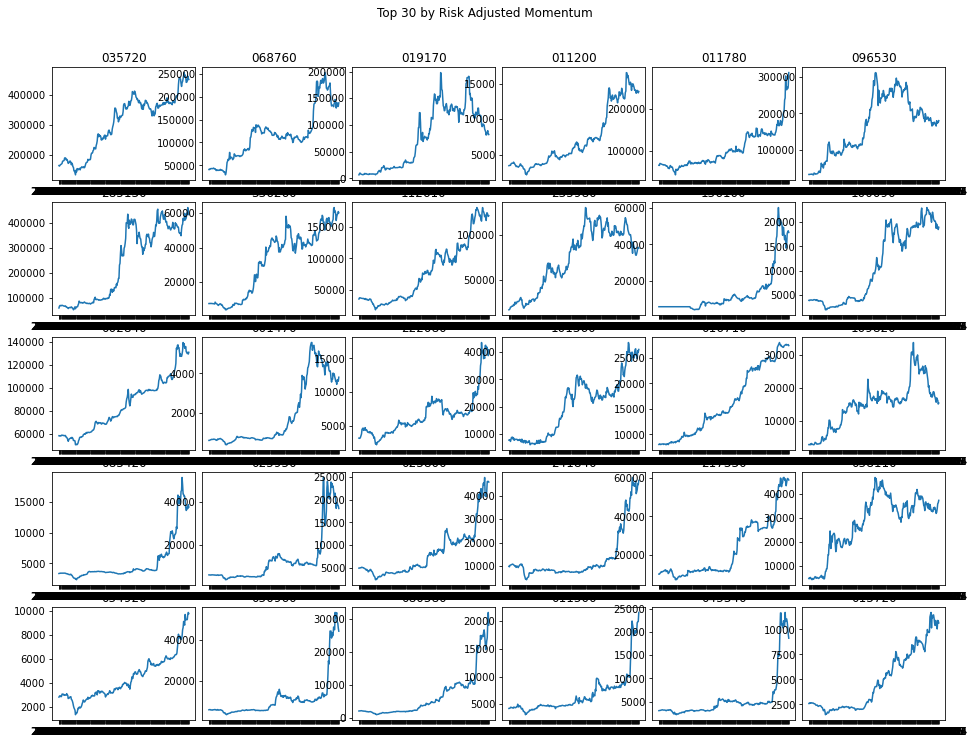

In [58]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(nrows=5, ncols=6, figsize=(16,12))

for n, ax in enumerate(axs.flatten()):
    ax.plot(select_sharpe.index.values, select_sharpe.iloc[:, n])                   
    ax.set_title(select_sharpe.columns[n], size = 12)

plt.suptitle('Top 30 by Risk Adjusted Momentum', y = 0.95)
plt.subplots_adjust(wspace=0.05)
plt.show()

# 9.4 밸류 전략

## 9.4.1 밸류 포트폴리오 구하기: 저PBR

In [122]:
import pandas as pd
import numpy as np
from statistics import stdev 

KOR_value = pd.read_csv('data/KOR_value.csv', index_col=0)
KOR_value.index = KOR_value.index.astype(np.str).str.zfill(6)

KOR_ticker = pd.read_csv('data/KOR_ticker.csv', index_col=0)
KOR_ticker['종목코드'] = KOR_ticker['종목코드'].astype(np.str).str.zfill(6)

In [60]:
invest_pbr  = (KOR_value['PBR'].rank() <= 30)

invest_pbr_res = KOR_ticker[invest_pbr.values][['종목코드', '종목명']]
invest_pbr_res['PBR'] = KOR_value.loc[invest_pbr, ['PBR']].round(4).values

invest_pbr_res

,종목코드,종목명,PBR
23,015760,한국전력,0.2195
105,001040,CJ,0.1992
109,000210,대림산업,0.2056
130,000880,한화,0.1400
261,000150,두산,0.1275
278,003380,하림지주,0.2214
414,032190,다우데이타,0.1834
429,009970,영원무역홀딩스,0.2099
641,058650,세아홀딩스,0.0973
643,003300,한일홀딩스,0.1811


## 9.4.2 각 지표 결합하기

In [71]:
rank_value  = KOR_value.rank(axis = 0)

In [73]:
rank_value.corr()

,PER,PBR,PCR,PSR
PER,1.000000,0.509783,0.552118,0.458765
PBR,0.509783,1.000000,0.640806,0.760277
PCR,0.552118,0.640806,1.000000,0.701528
PSR,0.458765,0.760277,0.701528,1.000000


In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

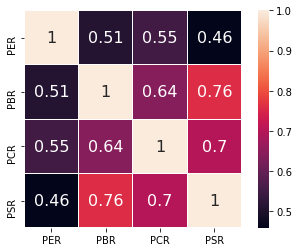

In [80]:
sns.heatmap(rank_value.corr(), linewidths = 0.1, vmax = 1.0, square = True, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [103]:
rank_value

,PER,PBR,PCR,PSR
종목코드,,,,
5930,554.0,1008.0,606.0,1185.0
660,801.0,1018.0,725.0,1365.0
51910,1034.0,1414.0,897.0,1254.0
207940,1044.0,1621.0,1247.0,1660.0
5380,439.0,357.0,1194.0,453.0
...,...,...,...,...
114570,NaN,NaN,NaN,NaN
80440,NaN,191.0,NaN,1031.0
58420,NaN,210.0,387.0,517.0


In [203]:
rank_sum = rank_value.sum(axis = 1, skipna=False)
invest_value  = (rank_sum.rank(method = 'first') <= 30)
invest_value_res = KOR_ticker[invest_value.values][['종목코드', '종목명']]
 
pd.merge(invest_value_res, KOR_value.loc[invest_value.values].reset_index(), on = '종목코드')

,종목코드,종목명,PER,PBR,PCR,PSR
0,078930,GS,6.498952,0.321417,2.228587,0.198775
1,001040,CJ,10.901776,0.199237,0.753471,0.086202
2,000210,대림산업,2.082829,0.205602,1.454612,0.142790
3,000150,두산,2.067445,0.127451,1.108332,0.046891
4,003380,하림지주,13.735015,0.221385,1.759196,0.103896
5,009970,영원무역홀딩스,4.468192,0.209905,1.913810,0.197462
6,093050,LF,6.315148,0.306794,2.788400,0.230547
7,084690,대상홀딩스,5.133866,0.306937,1.873693,0.104484
8,004690,삼천리,8.839525,0.239884,1.053718,0.096526
9,213500,한솔제지,8.002944,0.522983,1.605405,0.167373


## 9.5 퀄리티 전략
### 9.5.1 F-Score

In [207]:
import pickle
import pandas as pd
import numpy as np

with open('data/KOR_fs.pickle', 'rb') as f:
    KOR_fs = pickle.load(f)

KOR_ticker = pd.read_csv('data/KOR_ticker.csv', index_col=0)
KOR_ticker['종목코드'] = KOR_ticker['종목코드'].astype(np.str).str.zfill(6)    

In [209]:
KOR_fs

{'매출액':           2017/12    2018/12    2019/12
 종목코드                                   
 005930  2395754.0  2437714.0  2304009.0
 000660   301094.0   404451.0   269907.0
 051910   256980.0   281830.0   286250.0
 207940     4646.0     5358.0     7016.0
 005380   963761.0   968126.0  1057464.0
 ...           ...        ...        ...
 114570      962.0      316.0      124.0
 080440       88.0       63.0       41.0
 058420       69.0      127.0      114.0
 347140        NaN        NaN        NaN
 158310      135.0       49.0      101.0
 
 [2173 rows x 3 columns],
 '매출원가':           2017/12    2018/12    2019/12
 종목코드                                   
 005930  1292907.0  1323944.0  1472395.0
 000660   127018.0   151808.0   188253.0
 051910   201345.0   228368.0   237792.0
 207940     3328.0     3906.0     5096.0
 005380   787982.0   816705.0   880914.0
 ...           ...        ...        ...
 114570      581.0      203.0      170.0
 080440       71.0       61.0       42.0
 058420       

In [216]:
# 수익성

ROA = KOR_fs['지배주주순이익'] / KOR_fs['자산']
CFO = KOR_fs['영업활동으로인한현금흐름'] / KOR_fs['자산']
ACCURUAL = CFO - ROA

# 재무성과
LEV = KOR_fs['장기차입금'] / KOR_fs['자산']
LIQ = KOR_fs['유동자산'] / KOR_fs['유동부채']
OFFER = KOR_fs['유상증자']

# 운영 효율성
MARGIN = KOR_fs['매출총이익'] / KOR_fs['매출액']
TURN = KOR_fs['매출액'] / KOR_fs['자산']

KeyError: '장기차입금'

In [214]:
ACCURUAL

,2017/12,2018/12,2019/12
종목코드,,,
005930,0.068988,0.068191,0.067726
000660,0.089151,0.105047,0.068991
051910,0.049335,0.022540,0.082520
207940,0.034358,NaN,-0.032597
005380,-0.000620,0.012489,-0.013162
...,...,...,...
114570,NaN,NaN,NaN
080440,0.050549,0.077181,0.077758
058420,0.227848,0.060465,0.189573


## 9.5.2 각 지표를 결합하기

In [269]:
from datetime import date
import numpy as np

if date.today().month in(1,2,3,4):
    num_col = KOR_fs['매출액'].columns.str[0:4].get_loc(str(date.today().year - 2))
else:
    num_col = KOR_fs['매출액'].columns.str[0:4].get_loc(str(date.today().year - 1))

In [276]:
KOR_fs['매출액'].iloc[:, [num_col]]

,2019/12
종목코드,
005930,2304009.0
000660,269907.0
051910,286250.0
207940,7016.0
005380,1057464.0
...,...
114570,124.0
080440,41.0
058420,114.0
